<a href="https://colab.research.google.com/github/AbdullahAlTalaq/CollageThings/blob/main/YoloPlan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Text(0.5, 1.0, 'Original Image')

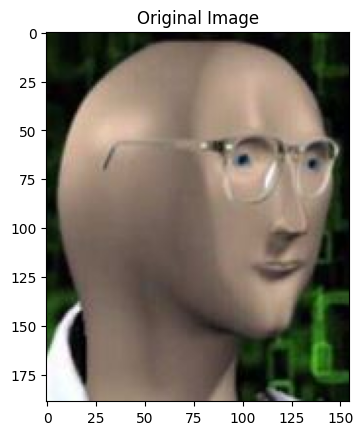

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
image_path='/content/1.jpg'

img =cv2.imread(image_path)

plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

plt.title('Original Image')

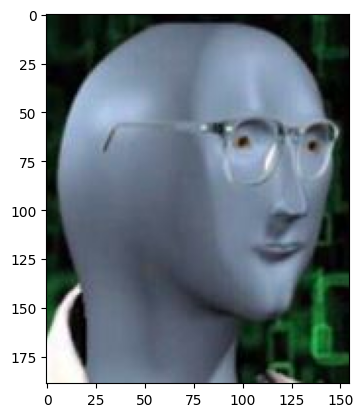

In [ ]:
plt.imshow(img,cmap='gray')

Text(0.5, 1.0, 'crop_img Image')

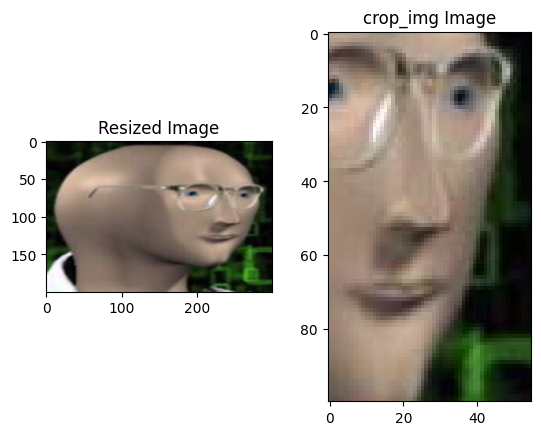

In [ ]:
resized_img=cv2.resize(img,(300,200))
crop_img=img[50:150,100:250] # Adjust the slicing indices based on your desired crop

plt.subplot(1,2,1)
plt.imshow(cv2.cvtColor(resized_img,cv2.COLOR_BGR2RGB))
plt.title("Resized Image")

plt.subplot(1,2,2)
plt.imshow(cv2.cvtColor(crop_img,cv2.COLOR_BGR2RGB))
plt.title("crop_img Image")

Text(0.5, 1.0, 'Sharpened Image')

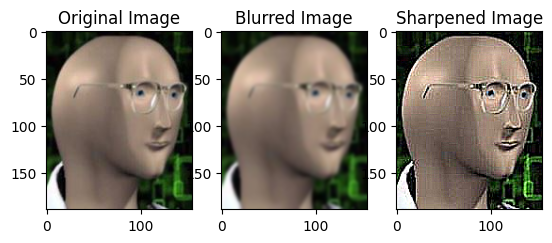

In [ ]:
blurred_img = cv2.GaussianBlur(img,(7,7),0)

sharpening_kernel=np.array([[-1,-1,-1]
                            ,[-1,9,-1]
                            ,[-1,-1,-1]])
sharpening_img = cv2.filter2D(img,-1,sharpening_kernel)

plt.subplot(1,3,1)
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1,3,2)
plt.imshow(cv2.cvtColor(blurred_img,cv2.COLOR_BGR2RGB))
plt.title('Blurred Image')

plt.subplot(1,3,3)
plt.imshow(cv2.cvtColor(sharpening_img,cv2.COLOR_BGR2RGB))
plt.title('Sharpened Image')



In [ ]:
img.shape

(189, 155, 3)

Text(0.5, 1.0, 'Flipped Image')

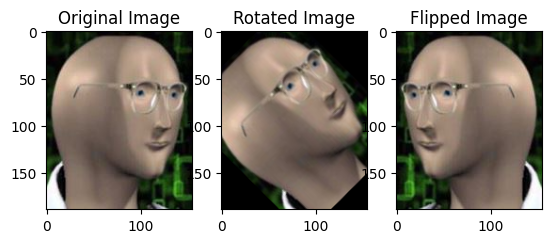

In [ ]:
rows,cols,_=img.shape
rotation_matrix = cv2.getRotationMatrix2D((cols/2,rows/2),45,1)
rotated_img = cv2.warpAffine(img,rotation_matrix,(cols,rows))

flipped_img =cv2.flip(img,1)

plt.subplot(1, 3, 1)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')

plt.subplot(1, 3, 3)
plt.imshow(cv2.cvtColor(flipped_img, cv2.COLOR_BGR2RGB))
plt.title('Flipped Image')

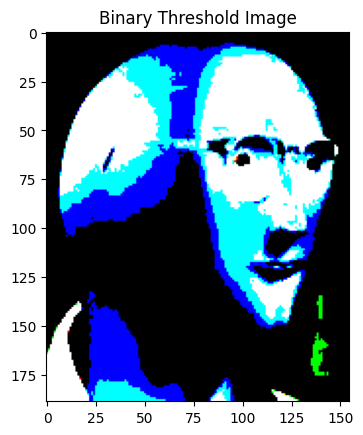

In [ ]:
_,binary_img = cv2.threshold(img,125,255,cv2.THRESH_BINARY)

plt.imshow(binary_img, cmap='gray')
plt.title('Binary Threshold Image')
plt.show()

In [ ]:
gray_img_8bit = cv2.convertScaleAbs(img)

In [ ]:
#contours,_ =cv2.findContours(binary_img,cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
binary_img = cv2.adaptiveThreshold(gray_img_8bit, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)

contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


contour_img=np.zeros_like(img)
cv2.drawContours(contour_img,contours, -1,-1,(0,255,0),2)

plt.imshow(cv2.cvtColor(contour_img,cv2.COLOR_BGR2RGB))

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/thresh.cpp:1674: error: (-215:Assertion failed) src.type() == CV_8UC1 in function 'adaptiveThreshold'


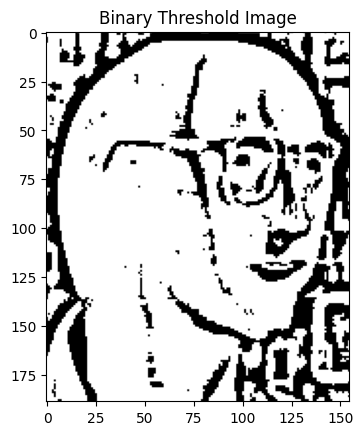

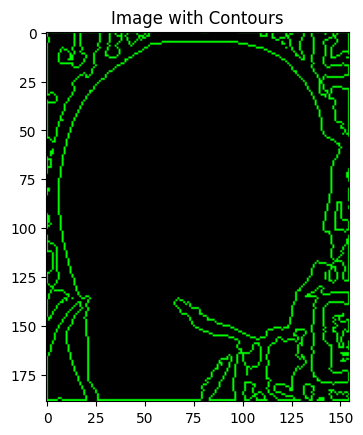

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load an image from file
image_path = '/content/1.jpg'  # Replace with the path to your image
img = cv2.imread(image_path)

# Convert the image to grayscale
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Convert the grayscale image to 8-bit
gray_img_8bit = cv2.convertScaleAbs(gray_img)

# Apply adaptive thresholding
binary_img = cv2.adaptiveThreshold(gray_img_8bit, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 4)

# Display the binary image
plt.imshow(binary_img, cmap='gray')
plt.title('Binary Threshold Image')
plt.show()

# Find contours in the binary image
contours, _ = cv2.findContours(binary_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Draw contours on a blank canvas
contour_img = np.zeros_like(img)
cv2.drawContours(contour_img, contours, -1, (0, 255, 0), 0)

# Display the image with contours
plt.imshow(cv2.cvtColor(contour_img, cv2.COLOR_BGR2RGB))
plt.title('Image with Contours')
plt.show()
